In [10]:
import pandas as pd
import numpy as np
# tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로드 및 확인
df = pd.read_csv('./data/wine.csv', header=None)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
# 6497개 샘플 x (12개 속성 + 결과)

# 속성 / 결과 데이터 분리
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [17]:
# 학습 셋 / 데이터 셋 분리
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.2, shuffle=True)

X_train.shape, X_test.shape # 5197 / 1300

((5197, 12), (1300, 12))

In [22]:
# 모델 구성
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                390       
                                                                 
 dense_17 (Dense)            (None, 12)                372       
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 검증 셋validation set 사용
# 검증 셋은 tf fit 실행 시, 비율 지정 파라메터(validation_split)로 세팅할 수 있다
"""
학습 데이터 셋 : 학습에 사용
검증 데이터 셋 : 학습하면서, 검증 셋의 결과를 이용해 최적화
테스트 데이터 셋 : 학습한 데이터의 결과를 확인
"""
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=500,
                    # 0.8 * 0.25 = 0.2 (전체 데이터 중)
                    validation_split=0.25 
                   )

Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 1.0624 - accuracy: 0.7529 - val_loss: 0.6729 - val_accuracy: 0.7585
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5097 - accuracy: 0.7557 - val_loss: 0.3948 - val_accuracy: 0.7908
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3738 - accuracy: 0.8342 - val_loss: 0.3403 - val_accuracy: 0.8546
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.8648 - val_loss: 0.3137 - val_accuracy: 0.8677
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8840 - val_loss: 0.2875 - val_accuracy: 0.8854
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.8958 - val_loss: 0.2651 - val_accuracy: 0.9000
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.9076 - val_loss: 0.2506 - val_accuracy: 0.9169
Epoch 8/50
8/8 [=================

In [30]:
loss, score = model.evaluate(X_test, y_test)
print('Test accuracy:', score)
print('Test loss:', loss)

41/41 [==============================] - 0s 879us/step - loss: 0.1316 - accuracy: 0.9508
Test accuracy: 0.9507692456245422
Test loss: 0.13158413767814636


In [31]:
# 위 케이스에서는 95% 정도의 정확성

In [33]:
# 회차별 모델 저장 및 활용
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장할 위치 지정
modelpath = './trained_model/ch14/{epoch:02d}-{val_accuracy:.4f}.hdf5'
# 모델 저장되는 조건 세팅
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 저장 조건 지정 및 학습 실행
history = model.fit(
                    X_train, y_train,
                    epochs=50,
                    batch_size=500,
                    validation_split=0.25,
                    callbacks=[checkpointer],
                    verbose=0
                   )


Epoch 1: saving model to ./trained_model/ch13/01-0.9615.hdf5

Epoch 2: saving model to ./trained_model/ch13/02-0.9631.hdf5

Epoch 3: saving model to ./trained_model/ch13/03-0.9631.hdf5

Epoch 4: saving model to ./trained_model/ch13/04-0.9631.hdf5

Epoch 5: saving model to ./trained_model/ch13/05-0.9631.hdf5

Epoch 6: saving model to ./trained_model/ch13/06-0.9608.hdf5

Epoch 7: saving model to ./trained_model/ch13/07-0.9562.hdf5

Epoch 8: saving model to ./trained_model/ch13/08-0.9638.hdf5

Epoch 9: saving model to ./trained_model/ch13/09-0.9654.hdf5

Epoch 10: saving model to ./trained_model/ch13/10-0.9638.hdf5

Epoch 11: saving model to ./trained_model/ch13/11-0.9608.hdf5

Epoch 12: saving model to ./trained_model/ch13/12-0.9662.hdf5

Epoch 13: saving model to ./trained_model/ch13/13-0.9685.hdf5

Epoch 14: saving model to ./trained_model/ch13/14-0.9692.hdf5

Epoch 15: saving model to ./trained_model/ch13/15-0.9685.hdf5

Epoch 16: saving model to ./trained_model/ch13/16-0.9615.hdf5



In [42]:
# 최종 모델 테스트 결과 출력
loss, score = model.evaluate(X_test, y_test)
print('Last Model Test accuracy:', score)
print('Last Model Test loss:', loss)

41/41 [==============================] - 0s 855us/step - loss: 0.0928 - accuracy: 0.9708
Last Model Test accuracy: 0.9707692265510559
Last Model Test loss: 0.09276435524225235


In [41]:
# 최고 모델 로드해서 테스트한 결과
from tensorflow.keras.models import load_model
best_model = load_model('./trained_model/ch14/46-0.9777.hdf5')
loss, score = best_model.evaluate(X_test, y_test)
print('Best Model Test accuracy:', score)
print('Best Model Test loss:', loss)

41/41 [==============================] - 0s 921us/step - loss: 0.0939 - accuracy: 0.9746
Best Model Test accuracy: 0.9746153950691223
Best Model Test loss: 0.09390377253293991


## 과적합Overfitting 확인

In [53]:
# 과적합 확인을 위해 2000번 학습 시킴
history = model.fit(
                    X_train, y_train,
                    epochs=2000,
                    batch_size=500,
                    validation_split=0.25,
                    verbose=0
                   )

In [55]:
# params : 학습한 설정 값들
history.params

{'verbose': 0, 'epochs': 2000, 'steps': 8}

In [56]:
# history : 결과 데이터
history.history

{'loss': [0.09069830924272537,
  0.09042829275131226,
  0.09034279733896255,
  0.0905388593673706,
  0.08967895805835724,
  0.08888022601604462,
  0.08695463836193085,
  0.08583623915910721,
  0.0860339105129242,
  0.08485215902328491,
  0.08429127186536789,
  0.08343656361103058,
  0.08387205749750137,
  0.08336194604635239,
  0.08209870755672455,
  0.08242584019899368,
  0.08118120580911636,
  0.08100742101669312,
  0.08306818455457687,
  0.08031521737575531,
  0.08079362660646439,
  0.08112958818674088,
  0.08229544758796692,
  0.08328679203987122,
  0.08131185919046402,
  0.07911311089992523,
  0.08036729693412781,
  0.08218268305063248,
  0.08383013308048248,
  0.0798235833644867,
  0.07842192053794861,
  0.07628744840621948,
  0.07671210169792175,
  0.07607206702232361,
  0.07487820088863373,
  0.07456246018409729,
  0.07530161738395691,
  0.07461057603359222,
  0.07367576658725739,
  0.07457627356052399,
  0.07288672029972076,
  0.07295756787061691,
  0.07442926615476608,
  0.07

In [60]:
# 결과 데이터 pandas로 말기
hist_df = pd.DataFrame(history.history)
# loss, accuracy : 학습 셋의 손실 / 정확성
# val_loss, val_accuracy : 검증 셋의 손실 / 정확성
# 2000회 시행 했으므로, 2000 row
hist_df 

,loss,accuracy,val_loss,val_accuracy
0,0.090698,0.975366,0.073550,0.975385
1,0.090428,0.974596,0.073667,0.976154
2,0.090343,0.974596,0.073033,0.976154
3,0.090539,0.974083,0.071491,0.976154
4,0.089679,0.974596,0.071893,0.977692
...,...,...,...,...
1995,0.025844,0.993328,0.039850,0.989231
1996,0.026144,0.992558,0.040897,0.986154
1997,0.031015,0.991789,0.042488,0.986923
1998,0.029398,0.991275,0.040144,0.988462


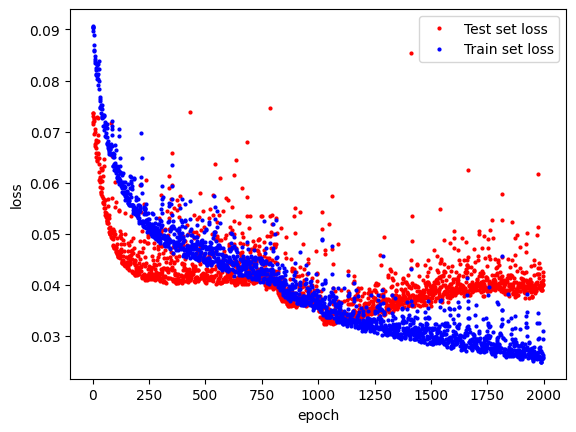

In [63]:
# loss 그래프 그리기
import matplotlib.pyplot as plt
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Test set loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Train set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
"""
학습 셋train set의 손실 그래프는 하강하지만,
테스트 셋test set의 손실 그래프는 어느 순간부터 하강이 멈추거나 오히려 늘어는 모양
=> 학습 셋에 과적합되기 때문

위 그래프를 보면, 과적합이 발생하는 시점을 loss 값의 변동으로 어느정도 확인할 수 있다.
이 시점에 학습을 중단시키고 그 때 모델을 사용할 수 있음
"""

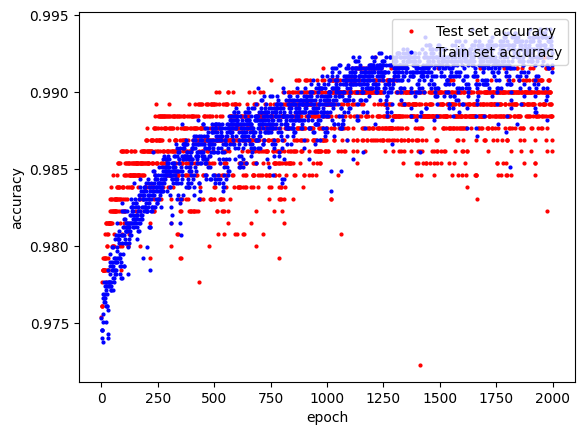

In [64]:
# 참고 : accuracy 그래프 그리기
y_vacc = hist_df['val_accuracy']
y_acc = hist_df['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, "o", c="red", markersize=2, label='Test set accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Train set accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## EarlyStopping

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
# Monitor val loss and stop by patience cost 
# patience cost : monitoring하는 값이 더 이상 낮아지지 않는 경우 멈추는 횟수

# 20으로 설정 : 학습 시행 시, val_loss가 20번 이상 낮아지지 않으면 학습 중단
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20
)

In [79]:
# 최고 모델 저장 설정 세팅
modelpath = './trained_model/ch14/best_model.hdf5'

checkpointer = ModelCheckpoint(
    filepath=modelpath,
    monitor='val_loss',
    verbose=0,
    save_best_only=True
)

# 모델 초기화
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                390       
                                                                 
 dense_21 (Dense)            (None, 12)                372       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [80]:
# 학습 실행 : early_stopping_callback 지정
history = model.fit(
                    X_train, y_train,
                    epochs=2000,
                    batch_size=500,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback, checkpointer],
                    verbose=1
                   )

Epoch 1/2000
8/8 [==============================] - 1s 20ms/step - loss: 5.6322 - accuracy: 0.2415 - val_loss: 3.3764 - val_accuracy: 0.1854
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 1.9368 - accuracy: 0.2453 - val_loss: 0.7765 - val_accuracy: 0.5762
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.5864 - accuracy: 0.6931 - val_loss: 0.5261 - val_accuracy: 0.7569
Epoch 4/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.5497 - accuracy: 0.7524 - val_loss: 0.5507 - val_accuracy: 0.7585
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.5570 - accuracy: 0.7529 - val_loss: 0.5211 - val_accuracy: 0.7592
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.5133 - accuracy: 0.7534 - val_loss: 0.4653 - val_accuracy: 0.7600
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.7560 - val_loss: 0.4084 - val_accuracy: 0.7677
Epoch 8/2000
8/8 [=

8/8 [==============================] - 0s 6ms/step - loss: 0.1773 - accuracy: 0.9376 - val_loss: 0.1550 - val_accuracy: 0.9454
Epoch 60/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1759 - accuracy: 0.9379 - val_loss: 0.1527 - val_accuracy: 0.9454
Epoch 61/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1742 - accuracy: 0.9389 - val_loss: 0.1518 - val_accuracy: 0.9454
Epoch 62/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1722 - accuracy: 0.9389 - val_loss: 0.1489 - val_accuracy: 0.9462
Epoch 63/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1709 - accuracy: 0.9400 - val_loss: 0.1484 - val_accuracy: 0.9454
Epoch 64/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1691 - accuracy: 0.9400 - val_loss: 0.1462 - val_accuracy: 0.9477
Epoch 65/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1674 - accuracy: 0.9405 - val_loss: 0.1440 - val_accuracy: 0.9477
Epoch 66/2000
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.1169 - accuracy: 0.9602 - val_loss: 0.0967 - val_accuracy: 0.9662
Epoch 118/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1163 - accuracy: 0.9577 - val_loss: 0.0961 - val_accuracy: 0.9662
Epoch 119/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1155 - accuracy: 0.9613 - val_loss: 0.0959 - val_accuracy: 0.9662
Epoch 120/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1153 - accuracy: 0.9589 - val_loss: 0.0963 - val_accuracy: 0.9677
Epoch 121/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1143 - accuracy: 0.9607 - val_loss: 0.0941 - val_accuracy: 0.9662
Epoch 122/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1136 - accuracy: 0.9600 - val_loss: 0.0946 - val_accuracy: 0.9677
Epoch 123/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1136 - accuracy: 0.9607 - val_loss: 0.0926 - val_accuracy: 0.9662
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9756 - val_loss: 0.0655 - val_accuracy: 0.9769
Epoch 176/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0855 - accuracy: 0.9754 - val_loss: 0.0652 - val_accuracy: 0.9769
Epoch 177/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0861 - accuracy: 0.9754 - val_loss: 0.0712 - val_accuracy: 0.9762
Epoch 178/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9749 - val_loss: 0.0649 - val_accuracy: 0.9785
Epoch 179/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0858 - accuracy: 0.9751 - val_loss: 0.0645 - val_accuracy: 0.9777
Epoch 180/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0842 - accuracy: 0.9769 - val_loss: 0.0640 - val_accuracy: 0.9769
Epoch 181/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0838 - accuracy: 0.9766 - val_loss: 0.0634 - val_accuracy: 0.9785
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9790 - val_loss: 0.0521 - val_accuracy: 0.9823
Epoch 234/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0720 - accuracy: 0.9769 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 235/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0716 - accuracy: 0.9777 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 236/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0713 - accuracy: 0.9792 - val_loss: 0.0537 - val_accuracy: 0.9862
Epoch 237/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.0517 - val_accuracy: 0.9823
Epoch 238/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.0523 - val_accuracy: 0.9862
Epoch 239/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.0501 - val_accuracy: 0.9846
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0450 - val_accuracy: 0.9869
Epoch 292/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.0432 - val_accuracy: 0.9862
Epoch 293/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0469 - val_accuracy: 0.9877
Epoch 294/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.0431 - val_accuracy: 0.9877
Epoch 295/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.0429 - val_accuracy: 0.9862
Epoch 296/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.0459 - val_accuracy: 0.9877
Epoch 297/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0627 - accuracy: 0.9823 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 

Epoch 349/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 350/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 351/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0585 - accuracy: 0.9828 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 352/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 353/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0390 - val_accuracy: 0.9892
Epoch 354/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9813 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 355/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9826 - val_loss: 0.0419 - val_accuracy: 0.9885
Epoch 

Epoch 407/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9851 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 408/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9843 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 409/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 410/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0387 - val_accuracy: 0.9908
Epoch 411/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0371 - val_accuracy: 0.9900
Epoch 412/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9854 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 413/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9856 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 

Epoch 465/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0358 - val_accuracy: 0.9892
Epoch 466/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0358 - val_accuracy: 0.9892
Epoch 467/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9851 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 468/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 0.0362 - val_accuracy: 0.9892
Epoch 469/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9854 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 470/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0376 - val_accuracy: 0.9908
Epoch 471/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch

In [86]:
loss, score = model.evaluate(X_test, y_test)
print('Test accuracy:', score)
print('Test loss:', loss)

41/41 [==============================] - 0s 842us/step - loss: 0.0604 - accuracy: 0.9838
Test accuracy: 0.983846127986908
Test loss: 0.060379303991794586


In [87]:
best_model = load_model('./trained_model/ch14/best_model.hdf5')
loss, score = best_model.evaluate(X_test, y_test)
print('Best Model Test accuracy:', score)
print('Best Model Test loss:', loss)

41/41 [==============================] - 0s 911us/step - loss: 0.0607 - accuracy: 0.9846
Best Model Test accuracy: 0.9846153855323792
Best Model Test loss: 0.06071414798498154


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          497 non-null    float64
 1   accuracy      497 non-null    float64
 2   val_loss      497 non-null    float64
 3   val_accuracy  497 non-null    float64
dtypes: float64(4)
memory usage: 15.7 KB


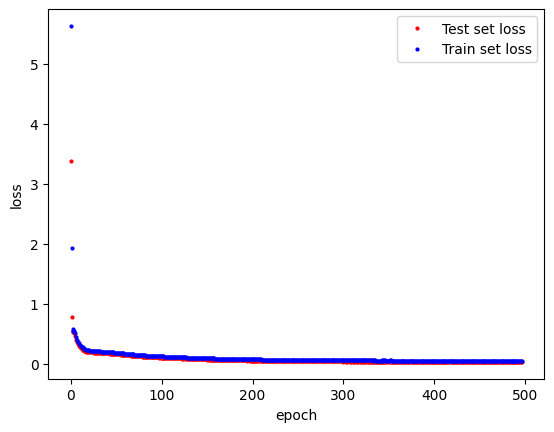

In [90]:
# loss 그래프 그리기
hist_df = pd.DataFrame(history.history)
# 497회에서 시행 중단 했으므로, 497 row
hist_df.info()

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Test set loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Train set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

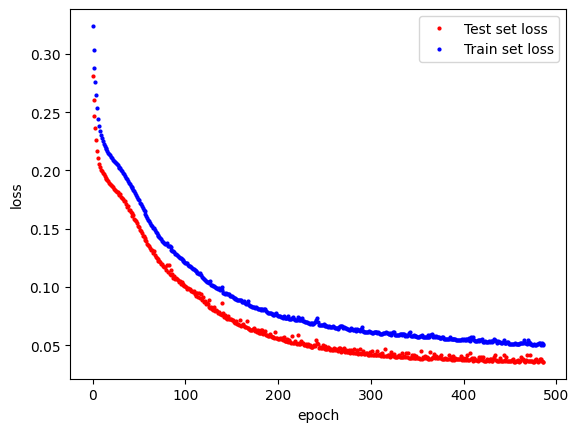

In [96]:
# 초기 결과들이 Loss가 커서 그래프가 잘 안보이므로, 10회 이후만 그래프 그리기
graph_start_epoch = 10
y_vloss = hist_df['val_loss'][graph_start_epoch:]
y_loss = hist_df['loss'][graph_start_epoch:]
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Test set loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Train set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

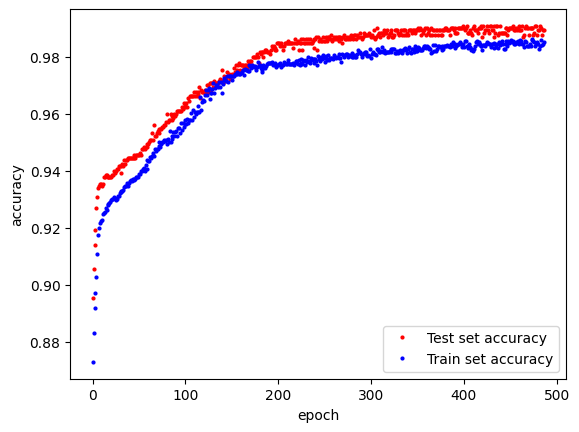

In [99]:
y_vacc = hist_df['val_accuracy'][graph_start_epoch:]
y_acc = hist_df['accuracy'][graph_start_epoch:]
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, "o", c="red", markersize=2, label='Test set accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Train set accuracy')

plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()